In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme("notebook")
sns.set_style("ticks")
sns.set_palette("Set2")

Welcome to the INI deep dive on assesment of structures.

This week we will be working on the data collected from a large testing campaign on a Hawk aircraft at the LVV in Sheffield.

So far, two test campaigns have been completed `{'LMS', 'NI'}` the first campaign collects data from an LMS system in the frequency domian. The second collected time domain data from a NI system.

In order to make accessing and working with the Hawk data as straightforward as possible this week, we have provided a utility function (in python (sorry matlab)).

In order to run these notebooks (and to get access to the hawk_tools package) install the dependencies by:

`pip install -r INI_hawk_requiremnts.txt` 

that is included in the repo.

In [2]:
from hawk_tools import get_hawk_data

Get Hawk data has the following call signiture
```
get_hawk_data(
    test_camp, 
    test_id, 
    test_runs=None, 
    test_reps=None, 
    download_dir="./.hawk_data", 
    disk_only=False, 
    ask=True, 
    load_kwargs={}
)
```
Of these, test_camp refers to the test campaign `{'LMS', 'NI'}`, and test_ID refers to the test type in the corresponding spreadsheet (check the repo for these).

Other args are hopefully self explanitory but a breif description is included here.

- `test_camp`: test campaign i.e. 'LMS' or 'NI'

- `test_id`: test type i.e. 'BR_AR' for burst random amplitude ramp

- `test_runs`: test runs to download i.e. `1` or `[1,2]` or `None` for all tests

- `test_reps`: test repeats to download i.e. `2` or `[1,2,4,8]` or None for all reps

- `download_dir`: download directory (caches files to here)

- `disk_only`: bool, do not load into ram, function returns `{}`

- `ask`: bool, disable user input check for large downloads

- `load_kwargs`: see below. specify only some data ranges to be loaded into ram

Below are a few examples of using the function and interacting with the data.

In [3]:
# Load a single rep of a single test

data = get_hawk_data("LMS", "BR_AR", 1, 1)
print(list(data.keys()))  # available datasets
print(list(data["BR_AR_1_1"].keys()))  # available sensors in the data
print(list(data["BR_AR_1_1"]["LTC-03"].keys()))  # fields per sensor


Using cached version: ./.hawk_data\LMS_BR_AR_1_1.hd5
['BR_AR_1_1']
['EXH', 'FRC', 'LLC-01', 'LLC-02', 'LLC-03', 'LLC-04', 'LLC-05', 'LLC-06', 'LLC-07', 'LLG-01', 'LLG-02', 'LLG-03', 'LLG-04', 'LLG-05', 'LLG-06', 'LRT-01', 'LRT-02', 'LRT-03', 'LRT-04', 'LTC-01', 'LTC-02', 'LTC-03', 'LTC-04', 'LTC-05', 'LTC-06', 'LTC-07', 'Meta', 'TRI-X', 'TRI-Y', 'TRI-Z', 'ULC-01', 'ULC-02', 'ULC-03', 'ULC-04', 'ULC-05', 'ULC-06', 'ULC-07', 'ULE-01', 'ULE-02', 'ULE-03', 'ULE-04', 'ULE-05', 'ULE-06', 'ULE-07', 'URT-01', 'URT-02', 'URT-03', 'UTC-01', 'UTC-02', 'UTC-03', 'UTC-04', 'UTC-05', 'UTC-06', 'UTC-07', 'UTE-01', 'UTE-02', 'UTE-03', 'UTE-04', 'UTE-05', 'UTE-06', 'UTE-07']
['Autopower Spectrum', 'Coherence Spectrum', 'Dynamic Stiffness', 'Frequency Response Function', 'Spectra', 'Time Signal', 'assettNumber', 'calibration', 'location', 'model', 'sensor']


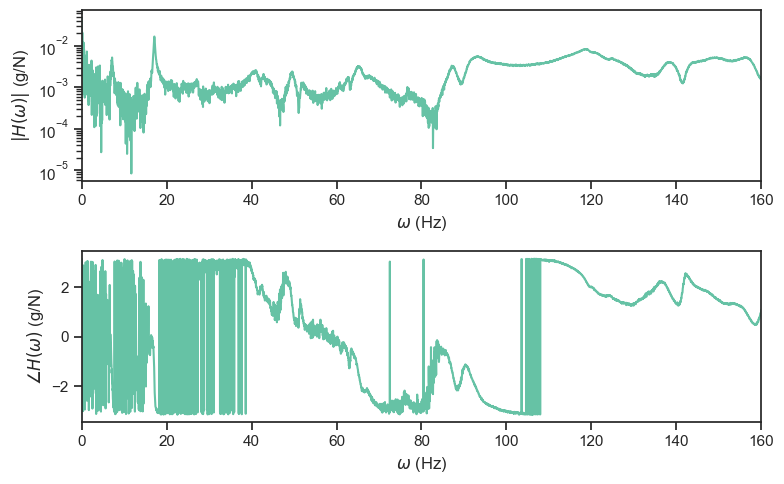

In [4]:
# pull out the FRF of a sngle sensor and plot

H = data["BR_AR_1_1"]["LTC-03"]["Frequency Response Function"]["Y_data"]["value"]
w = data["BR_AR_1_1"]["LTC-03"]["Frequency Response Function"]["X_data"]["value"]

H_units = data["BR_AR_1_1"]["LTC-03"]["Frequency Response Function"]["Y_data"]["units"]

fig, axs = plt.subplots(2, 1, figsize=(8, 5))
axs[0].semilogy(w, np.abs(H))
axs[1].plot(w, np.angle(H))
axs[0].set_xlabel(r"$\omega$ (Hz)")
axs[1].set_xlabel(r"$\omega$ (Hz)")
axs[0].set_ylabel(r"$|H(\omega)|$ ({})".format(H_units))
axs[1].set_ylabel(r"$\angle H(\omega)$ ({})".format(H_units))
axs[0].set_xlim([0, 160])
axs[1].set_xlim([0, 160])
plt.tight_layout()
plt.show()


In [5]:
# load more repittions - note that the earlier download is cached

data = get_hawk_data("LMS", "BR_AR", 1, [1, 2, 3])
print(list(data.keys()))


Using cached version: ./.hawk_data\LMS_BR_AR_1_2.hd5
Using cached version: ./.hawk_data\LMS_BR_AR_1_1.hd5
Using cached version: ./.hawk_data\LMS_BR_AR_1_3.hd5
['BR_AR_1_2', 'BR_AR_1_1', 'BR_AR_1_3']


In [6]:
# load some NI data

data = get_hawk_data("NI", "RPH_AR", 1, [1, 2])
print(list(data.keys()))  # available datasets
print(list(data["RPH_AR_1_1"].keys()))  # available sensors in the data
print(list(data["RPH_AR_1_1"]["LTC-01"].keys()))  # fields per sensor
# Note the different fields available between test campaigns


Using cached version: ./.hawk_data\NI_RPH_AR_1_2.hd5
Using cached version: ./.hawk_data\NI_RPH_AR_1_1.hd5
['RPH_AR_1_2', 'RPH_AR_1_1']
['EXH', 'FRC-01', 'LLC-01', 'LLC-02', 'LLC-03', 'LLC-04', 'LLC-05', 'LLC-06', 'LLC-07', 'LLG-01', 'LLG-02', 'LLG-03', 'LLG-04', 'LLG-05', 'LLG-06', 'LRT-01', 'LRT-02', 'LRT-03', 'LRT-04', 'LTC-01', 'LTC-02', 'LTC-03', 'LTC-04', 'LTC-05', 'LTC-06', 'LTC-07', 'TRI-X', 'TRI-Y', 'TRI-Z', 'ULC-01', 'ULC-02', 'ULC-03', 'ULC-04', 'ULC-05', 'ULC-06', 'ULC-07', 'ULE-01', 'ULE-02', 'ULE-03', 'ULE-04', 'ULE-05', 'ULE-06', 'ULE-07', 'URT-01', 'URT-02', 'URT-03', 'UTC-01', 'UTC-02', 'UTC-03', 'UTC-04', 'UTC-05', 'UTC-06', 'UTC-07', 'UTE-01', 'UTE-02', 'UTE-03', 'UTE-04', 'UTE-05', 'UTE-06', 'UTE-07', 'Meta']
['Measurement', 'Timestamp']


For more information on the sensor locations and the test runs, check out the spreadsheets available in the repo in the extra info folder.

#### Advanced usage:
Optionally, the load_kwargs can be used to only load certain signals from the data. A few examples are included below.

In [7]:
# Load only the FRFs (considerably faster)

load_opts = {
    "data": "Frequency Response Function",  # FRFs only
    "meta": False,  # do not load metadata i.e test specific data
    "attrs": False,  # do not load attributes i.e sensor number
    "compress_x_axis": True,  # add x data as seperate channel (rather than copying to each sensor)
    "sensors": None,  # Load all sensors
}

data = get_hawk_data("LMS", "BR_AR", 1, [1, 2, 3], load_kwargs=load_opts)
print(list(data.keys()))  # available datasets
print(list(data["BR_AR_1_1"].keys()))  # available sensors in the data
print(list(data["BR_AR_1_1"]["LTC-03"].keys()))  # fields per sensor

ws = data["BR_AR_1_1"][
    "X_data"
]  # frequency vector available at the top level of each test now

Using cached version: ./.hawk_data\LMS_BR_AR_1_2.hd5
Using cached version: ./.hawk_data\LMS_BR_AR_1_1.hd5
Using cached version: ./.hawk_data\LMS_BR_AR_1_3.hd5
['BR_AR_1_2', 'BR_AR_1_1', 'BR_AR_1_3']
['EXH', 'X_data', 'FRC', 'LLC-01', 'LLC-02', 'LLC-03', 'LLC-04', 'LLC-05', 'LLC-06', 'LLC-07', 'LLG-01', 'LLG-02', 'LLG-03', 'LLG-04', 'LLG-05', 'LLG-06', 'LRT-01', 'LRT-02', 'LRT-03', 'LRT-04', 'LTC-01', 'LTC-02', 'LTC-03', 'LTC-04', 'LTC-05', 'LTC-06', 'LTC-07', 'Meta', 'TRI-X', 'TRI-Y', 'TRI-Z', 'ULC-01', 'ULC-02', 'ULC-03', 'ULC-04', 'ULC-05', 'ULC-06', 'ULC-07', 'ULE-01', 'ULE-02', 'ULE-03', 'ULE-04', 'ULE-05', 'ULE-06', 'ULE-07', 'URT-01', 'URT-02', 'URT-03', 'UTC-01', 'UTC-02', 'UTC-03', 'UTC-04', 'UTC-05', 'UTC-06', 'UTC-07', 'UTE-01', 'UTE-02', 'UTE-03', 'UTE-04', 'UTE-05', 'UTE-06', 'UTE-07']
['Frequency Response Function']



Suggested next steps / exercises

- Load the data on your machine
- Explore the data and make some plots
- Visually compare damaged and undamaged cases
